[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/ipml/blob/master/tutorial_notebooks/7_eda_solutions.ipynb) 

# Explanatory Data Analysis
<span style="font-weight: bold; color: red;">This version includes solutions to the exercises. </span>
<hr>
<br>

The notebook revisits our lecture on EDA and data preparation. We will focus on the EDA part and use standard Python libraries for data visualization including `matplotlib` and `seaborn`. In this scope, we will also re-introduce concepts basic concepts from the reals of multivariate statistics. 

The notebook uses a data set related to credit risk modeling.

Before moving on, let's import some of our standard library so that we have them ready when we need them.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# The HMEQ data set
Our data set, called the  "Home Equity" or, in brief, HMEQ data set, is provided by www.creditriskanalytics.net. It comprises  information about a set of borrowers, which are categorized along demographic variables and variables concerning their business relationship with the lender. A binary target variable called 'BAD' is  provided and indicates whether a borrower has repaid her/his debt. You can think of the data as a standard use case of binary classification.

You can obtain the data, together with other interesting finance data sets, directly from www.creditriskanalytics.net. The website also provides a brief description of the data set. Specifically, the data set consists of 5,960 observations and 13 features including the target variable. The variables are defined as follows:

- BAD: the target variable, 1=default; 0=non-default 
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

As you can see, the features aim at describing the financial situation of a borrower. We will keep using the data set in future tutorials. Therefore, it makes sense to familiarize yourself with the above features.

## Loading the data
Let's start by loading the data and taking a look at the some entries. For simplicity, we provide a version in our [GitHub repository](https://github.com/Humboldt-WI/IPML/tree/main).

In [ ]:
# Load the HMEQ Data from our GitHub
url = 'https://raw.githubusercontent.com/Humboldt-WI/IPML/master/data/hmeq.csv'
hmeq = pd.read_csv(url)

# Some type conversion; just ignore for now
hmeq.JOB = hmeq.JOB.astype('category')
hmeq.REASON = hmeq.REASON.astype('category')
hmeq.LOAN = hmeq.LOAN.astype('float64')
hmeq.BAD = hmeq.BAD.astype('bool')

# Preview some entries
hmeq

## Pandas revisited
Recall that we have been using the `Pandas` library for a while. Back then in [tutorial 4, preparing for machine learning](https://github.com/Humboldt-WI/IPML/blob/main/tutorial_notebooks/4_preparing_for_machine_learning_tasks.ipynb), we introduced the methods `.info()` and `.describe()` to get a quick overview of the data. Below, we apply them to the HMEQ data set.

In [ ]:
# Summarize the columns (i.e., features) in the data 
# and obtain some structural information
hmeq.info()

In [ ]:
# For a statistical summary of the data, we can use the describe method
hmeq.describe()

Note the row indices in the output of the `.describe()` method. They indicate what descriptive statistics have been calculated. For example, the row index 'mean' shows the mean value of each feature, whereby `.describe()` ignores non-numerical features by default.

### Mini-Exercise
Intepreting the output of the `.describe()` method, is complicated by the fact that the numbers are shown with high precision. Apply the method `.round()` to the output to round numbers to 2 digits of precision.

In [ ]:
# Solution to the mini-exercise
hmeq.describe().round(2)

### Exercise 1:
What insights can we obtain from the descriptive statistics? What do the numbers tell us about the data set? Note down your observations in the markdown cell below.

Space for your observations:
- ...
- ...
- ...

### Navigating data
We discussed indexing and slicing in the contexts of Python `lists` and other containers like dictionaries. In `Pandas`, `Numpy`, and other libraries, indexing/slicing are equally important and work in similar ways. Here, we provide a few more demos on common ways to use indexing in `Pandas`. A web search for "pandas data frame indexing" will provide many additional insights if you are interested. 

### Basic indexing of rows and columns

In [ ]:
# Accessing a single column by name
hmeq['BAD']
# Alternatively, you can access a single column using dot-notation
hmeq.BAD

For the *R* programmers: we can index our data in a way similar to *R*. Note the use of `loc[]`. This is a special type of syntax you need to memorize. Also note that we specify the columns we want to index using a `list`. Hence the inner box bracket.

In [ ]:
# R-style indexing of selected rows and columns
hmeq.loc[0:4, ["BAD", "LOAN"]]  # select row 0, 1, 2, 3 and for those rows only the columns BAD and LOAN

To access rows or columns using a numerical index, we can use the `iloc[]` method.

In [ ]:
# Access columns by a numerical index using .iloc
hmeq.iloc[0:4, 0]  # select row 0, 1, 2, 3 and for those rows only the first column
hmeq.iloc[0:4, [0, 3, 5]]  # select row 0, 1, 2, 3 and for those rows only the columns 0, 3, 5
hmeq.iloc[0:4, np.arange(4)]  # select row 0, 1, 2, 3 and for those rows only the first four columns    

A few cautionary notes on numerical indexing in Python. The `loc()` method considers the index of the data frame. In the above output, this is the left-most column without header. We have not defined a custom row index and Python uses consecutive integer numbers by default. Thus, calls to `loc()` and `iloc()` look more similar than they are. A data frame could also have a custom index. For example, the data frame returned from calling `describe()` (see above) uses a custom row index with values *count*, *mean*, *std*, etc. To deepen your understanding of the differences in data frame indexing, solve the following exercise. 

#### Exercise 2:
- Execute the command `df = hmeq.describe()` to create a new data frame `df` that stores the result of the `describe()` method.
- Use the method `df.loc[]` to access the standard deviation of the feature MORTDUE. Print out the result.
- Use the method `df.iloc[]` to access and print out the same figure, i.e. the standard deviation of the feature MORTDUE.
- Using `loc[]` access and print out the mean of the features LOAN, VALUE, and DEROG.  
- Using `iloc[]` access and print out the minimum value of all features. Make use of the `:` operator to select all columns. 
- Using `loc[]` access and print out the values of the first, second, and third quartile of the distribution of the features LOAN, YOJ, and DEBTINC

In [ ]:
# Solutions to exercise 2
df = hmeq.describe()
# Use the method `df.loc[]` to access the standard deviation of the feature MORTDUE. Print out the result.
print(df.loc['std', 'MORTDUE'])
print('-' * 50)
# Use the method `df.iloc[]` to access and print out the same figure, i.e. the standard deviation of the feature MORTDUE.
print(df.iloc[2, 2])
print('-' * 50)
# Using `loc[]` access and print out the mean of the features LOAN, VALUE, and DEROG.  
print(df.loc['mean', ['LOAN', 'VALUE', 'DEROG']])
print('-' * 50)
# Using `iloc[]` access and print out the minimum value of all features. Make use of the `:` operator to select all columns. 
print(df.iloc[3, :])
print('-' * 50)
# Using `loc[]` access and print out the values of the first, second, and third quartile of the distribution of the features LOAN, YOJ, and DEBTINC
print(df.loc[['25%', '50%', '75%'], ['LOAN', 'YOJ', 'DEBTINC']])

### Other common forms of indexing and subset selection
It is also common practice to select rows based on comparisons of feature values using `.loc`. Here are a few examples:

In [ ]:
hmeq.loc[hmeq.BAD == True, :]  # Get all observations with target variable BAD = 1. The : means you want to retrieve all columns 

In [ ]:
hmeq.loc[hmeq["NINQ"]>12, ["LOAN", "VALUE", "NINQ"]]  # Another example where we select only a subset of the columns

# Grouping data
Grouping data is a common operation in data analysis. It is often used in combination with aggregation functions like `sum()`, `mean()`, `count()`, etc. While previous demos and exercises have looked into the mean and standard deviation of features, it would be very interesting to perform this analysis for good and bad payers separately. For example, a plausible hypothesis in credit risk modeling is that the ratio of debt to income (i.e., feature DEBTINC) is a predictor of credit risk. We would thus expect that the mean debt-to-income ration is higher for bad payers. Grouping allows us to verify such a hypothesis. 

The `groupby()` method in `Pandas` is a powerful tool for grouping data. Below, we provide a few examples of how to use the `groupby()` method.

In [ ]:
features = ["LOAN", "DEBTINC"]  # Define a list of features
print(hmeq.groupby("BAD")[features].mean())  # Calculate the mean of the features for each group of BAD
print('-' * 50)
print(hmeq.groupby("BAD")[features].std())
print('-' * 50)
print(hmeq.groupby("BAD")[features].quantile(q=0.95))

# Categorical features
Thus far, we have focused on numerical features. However, the HMEQ data set also contains categorical features. In the context of credit risk modeling, the features REASON and JOB are of particular interest. The feature REASON indicates the reason for the loan request, while the feature JOB indicates the occupation of the borrower.

A typical EDA question is to investigate the distribution of categorical features. We can use the `value_counts()` method to count the number of occurrences of each category. Furthermore, we can again make use of grouping to examine the distribution of category levels across good and bad payers (i.e., values of our target).

Below, we provide a few examples.

In [ ]:
# Examining the distribution of the REASON feature
hmeq["REASON"].value_counts()

In [ ]:
# Create a cross-tabulation of the BAD and REASON feature
pd.crosstab(hmeq.BAD, hmeq.REASON)  

## Exercise 3:
- Consider the feature DEBTINC. Use the `groupby()` method to compare the median debt-to-income ratio among good and bad payers. 
- Create a cross-table of the features BAD and JOB. 
- Recreate the cross-table of BAD vs. JOB. Make sure that it does not show absolute counts but relative frequencies. 

In [ ]:
# Solution to exercise 3
hmeq.groupby("BAD")["DEBTINC"].median()

In [ ]:
# Create a cross-tabulation of the BAD and JOB features
pd.crosstab(hmeq.BAD, hmeq.JOB)  

In [ ]:
# Create a normalized cross-tabulation of the BAD and JOB features
pd.crosstab(hmeq.BAD, hmeq.JOB, normalize=True)  

# Common EDA Visualizations

## Histograms and Count plots
Histograms are a common visualization tool to understand the distribution of numerical features. In the context of credit risk modeling, it is important to understand the distribution of features like DEBTINC, LOAN, and VALUE. Below, we provide a few examples of how to create histograms using `seaborn` library.  

In [ ]:
# Create a histogram of the feature LOAN 
sns.histplot(hmeq.LOAN)  
plt.show()

In [ ]:
sns.histplot(hmeq.LOAN, kde=True)  # Add a kernel density estimate
plt.show()

In [ ]:
# Create a histogram of the feature LOAN while specifying the number of bins 
sns.histplot(hmeq.LOAN, bins=20)  
plt.show()

In [ ]:
# Grouping the histogram of the LOAN feature by the target variable BAD and creating a histogram of the feature LOAN
sns.histplot(data=hmeq, x='LOAN', hue='BAD')
plt.show()


### Exercise 4:
Count plots are a visualization tool similar to the histogram but suitable for categorical. Using `seaborn`, their creation follows the same logic as exemplified above. Give it a try. Specifically:
- Create a count plot for the feature REASON.
- Create a count plot for the feature JOB grouped by the target variable.

In [ ]:
# Solution to exercise 4
sns.countplot(data=hmeq, x='REASON')
plt.show()

sns.countplot(data=hmeq, x='JOB', hue='BAD')
plt.show()

## Box plots
Box plots are a powerful visualization tool to understand the distribution of numerical features across different categories. Some consider the box plot the most important visualization in data science. While this opinion is debatable, the importance of the box-plot cannot be underestimated. Let's begin with some examples of how to create a box plot using `seaborn`. 

In [ ]:
# Simple boxplot of the feature LOAN
sns.boxplot(data=hmeq, y='LOAN')
plt.show()

In [ ]:
# Boxplot of the feature LOAN in which we set the threshold for outliers to be 3 times the IQR
sns.boxplot(data=hmeq, y='LOAN', whis=3)
plt.show()

In [ ]:
# Boxplot of the feature LOAN grouped by the target variable BAD
sns.boxplot(data=hmeq, y='LOAN', x='BAD') 
plt.show()

### Exercise 5:
Drawing on the above demos, solve the following exercises:
- Create a box plot for the feature VALUE.
- Create a box plot for the feature DEBTINC grouped by the target variable.
- Create a boxplot for the feature MORTDUE and set the threshold for outliers to be 2 times the IQR
- Create a boxplot for the feature LOAN grouped by the feature REASON
- Manual outlier identification:
  - Manually compute the IQR for the feature LOAN as well as the boundaries for upper and lower outliers using Tukey's rule (i.e. with a threshold of 1.5 times the IQR). 
  - Create an index (i.e. an array of boolean values) that selects all outlier values in the LOAN feature. 
  - Recreate the boxplot for the feature LOAN and confirm that your manually computed values agree with the boxplot.

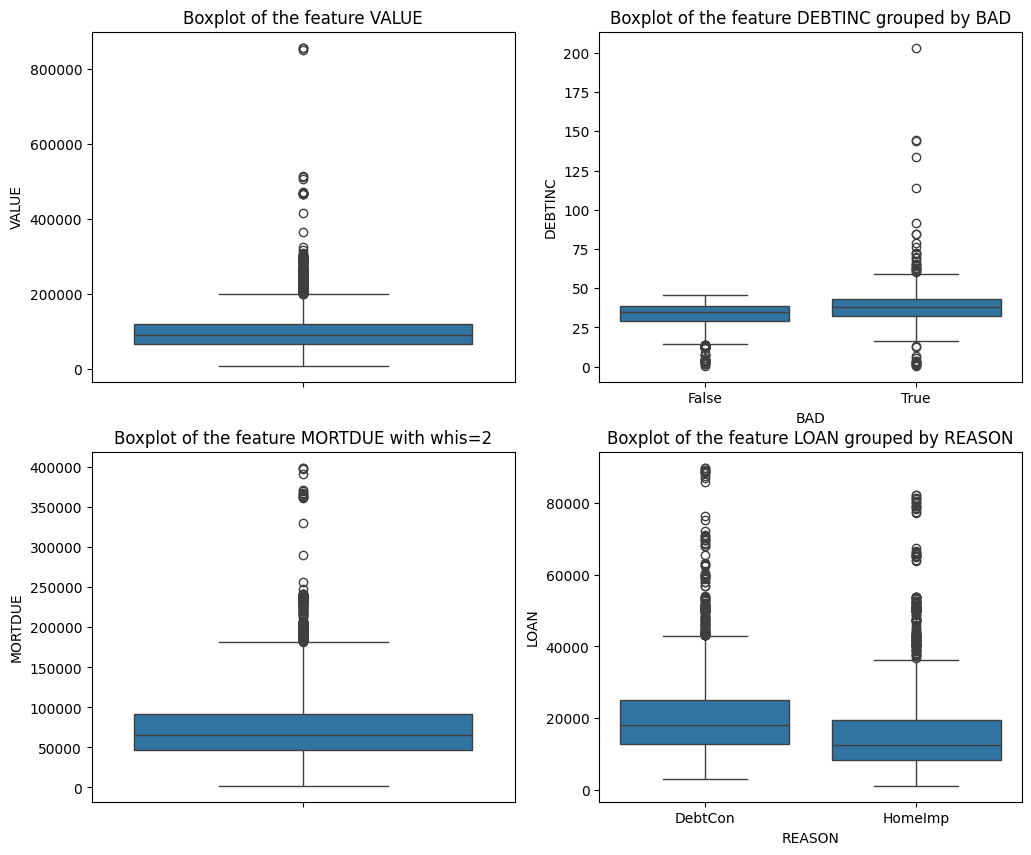

In [35]:
# Solution to exercise 5

# Define a plot with four subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Create a boxplot for the feature VALUE
sns.boxplot(data=hmeq, y='VALUE', ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of the feature VALUE') # Set the title of the subplot

# 2. Create a boxplot for the feature DEBTINC grouped by the target variable
sns.boxplot(data=hmeq, y='DEBTINC', x='BAD', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of the feature DEBTINC grouped by BAD')    # Set the title of the subplot 

# 3. Create a boxplot for the feature MORTDUE and set the threshold for outliers to be 2 times the IQR
sns.boxplot(data=hmeq, y='MORTDUE', whis=2, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of the feature MORTDUE with whis=2')    # Set the title of the subplot

# 4. Create a boxplot for the feature LOAN grouped by the feature REASON
sns.boxplot(data=hmeq, y='LOAN', x='REASON', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of the feature LOAN grouped by REASON')    # Set the title of the subplot  

plt.show()

Lower bound: -7200.0, Upper bound: 41600.0
Outliers among LOAN values:
5704    41700.0
5705    41700.0
5706    41700.0
5707    41700.0
5708    41800.0
         ...   
5955    88900.0
5956    89000.0
5957    89200.0
5958    89800.0
5959    89900.0
Name: LOAN, Length: 256, dtype: float64


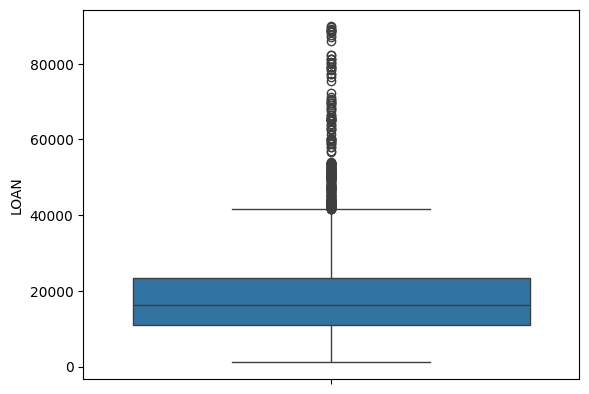

In [36]:
# Manually compute the IQR for the feature LOAN as well as the boundaries for upper and lower outliers using Tukey's rule (i.e. with a threshold of 1.5 times the IQR). Compare the results with the boxplot.
q1 = hmeq['LOAN'].quantile(0.25)
q3 = hmeq['LOAN'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f"Lower bound: {lower}, Upper bound: {upper}")

# Index of outliers in LOAN
ix_outliers = (hmeq['LOAN'] < lower) | (hmeq['LOAN'] > upper)

# Demonstrate using the index
print('Outliers among LOAN values:')
print(hmeq.LOAN[ix_outliers])


sns.boxplot(data=hmeq, y='LOAN')
plt.show()


### Violin Plots
Violin plots are a combination of box plots and kernel density plots. They provide a more detailed view of the distribution of numerical features across different categories. Arguably, this type of visualization is less common. However, it can be useful and so we complete this part with a few demos.

In [ ]:
# Violin plot of the feature LOAN grouped by the feature JOB
sns.violinplot(data=hmeq, x='JOB', y='LOAN') 
plt.show()

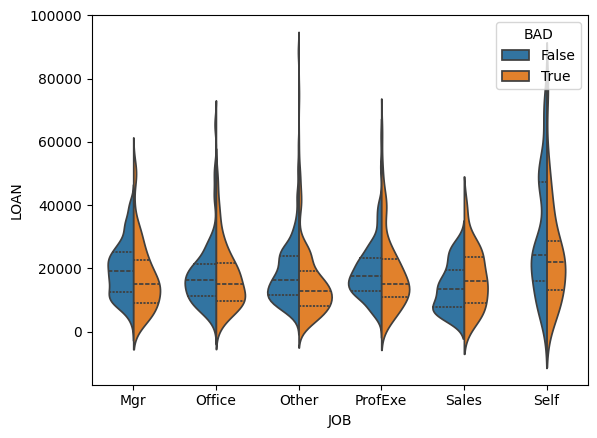

In [42]:
# Split the violins by the target variable BAD
sns.violinplot(data=hmeq, x='JOB', y='LOAN', hue='BAD', split=True, inner='quartile') 
plt.show()

## Correlation Matrix
Correlation is a key concept in multivariate analysis. It measures the strength and direction of a linear relationship between two numerical variables. The correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, while a value of -1 indicates a perfect negative linear relationship. A value of 0 indicates no linear relationship.

In a data set like our HMEQ data set, it is important to understand the correlation between features. For example, a high correlation between two features could indicate multicollinearity. This is a problem in regression analysis, as it can lead to unstable estimates of the regression coefficients. The correlation of features with the target variable is of key interest. For example, a high correlation between a feature and the target variable could indicate that the feature is a good predictor of the target.

To calculate the correlation matrix, we can use the `corr()` method in `Pandas`. Note that this method will throw an error if it received non-numerical data. Therefore, we first select features based on their data type using the method `select_dtypes()`. Excluding categorical features (i.e., REASON and JOB), avoids problems when applying the `corr()` method. As result, we obtain a data frame with all pairwise correlation among the numerical features including the target. 

In [ ]:
corr= hmeq.select_dtypes(exclude='category').corr()
corr.round(3)

Looking at large tables of numbers is cumbersome. We can visualize the correlation matrix using a heatmap. The `seaborn` library provides a convenient method for this purpose. 

In [ ]:
f,ax = plt.subplots(figsize=(12, 8))  # The correlation matrix needs some space. So we set the size of the plot explicitly
sns.heatmap(corr, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

While better than looking at the raw numbers, the correlation matrix is still a bit hard to interpret. We can improve the visualization by highlighting high correlations (e.g., higher than a user-defined threshold). To achieve this, we can use the `mask` argument in the `heatmap()` method.

In [ ]:
# Create a mask of correlations above a user-specified threshold
threshold = 0.20
mask = (corr <= threshold) & (corr >= -threshold)
f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, mask=mask, linewidth=.5)
plt.show()

